# Monte Carlo Coin Flip Simulation

The basic principle of the Monte Carlo Method is to implement on a computer the <b>Strong Law of Large Numbers (SLLN)</b>.

If we can generate a sequence $X_1, X_2, X_3, \ldots$ of i.i.d. random variables (i.e., independent and identically distributed) with finite mean $\mathbb{E}[X_1] = \mu$, then the SLLN guarantees that the <i>sample mean</i> (or <i>empirical mean</i>)

$$ \bar{X}_n = \frac{X_1 + X_2 + \ldots + X_n}{n} ç \mu \qquad \text{as } n \rightarrow \infty \text{ with probability 1}.$$

In other words, $\bar{X}_n$ is a good approximation for $\mu$ if the number of simulations $n$ is large enough:

$$ \bar{X}_n \approx \mu \qquad \text{for } n \text{ large}.$$

In addition, if we are interested in approximating the probability that some event $A$ occurs, we might adopt the SLLN as follows: We simulate repeated independent trials of a random experiment and define the sequence of random variables $X_1, X_2,\dots$ via

$$ X_i = \begin{cases} 1 & \text{if $A$ occurs on the $i$-th simulation} \\ 0 & \text{if $A$ does not occur on the $i$-th simulation} \end{cases} \qquad (i = 1,2,3,\ldots).$$

Then, $\bar{X}_n$ is the proportion of the $n$ trials in which $A$ occurs. By construction the random variables $X_1, X_2,\dots$ are independent and identically distributed with mean $\mathbb{E}[X_1] = \mathbb{P}[A]$. Thus, by the SLLN we again obtain

$$ \bar{X}_n = \frac{X_1 + X_2 + \ldots + X_n}{n} \longrightarrow \mathbb{P}[A] \qquad \text{as } n \rightarrow \infty \text{ with probability 1},$$

and hence 

$$ \bar{X}_n \approx \mathbb{P}[A] \qquad \text{for } n \text{ large}.$$



In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

We'll consider flipping a coin $n$ times. The probability for heads is given by $p$ where $p$ is some parameter which can be chosen from the interval $(0,1)$. 

We'll write a Python code to simulate $n$ coin flips with heads probability $p$ and compute the running proportion of heads $\bar{X}_n$ for $n$ running from 1 to 1,000 trials.

In [2]:
def coinSim(p):
    simArray = []
    uArray = [1 if x < p else 0 for x in np.random.random_sample(1000)]
    simSum = 0
    for n in range(1,1001):
        simSum += uArray[n-1]
        simMean = simSum/n
        simArray.append(simMean)
    return simArray

We'll use a plot to illustrate how the proportion of heads appears to converge to $p$ as $n$ approaches 1,000.

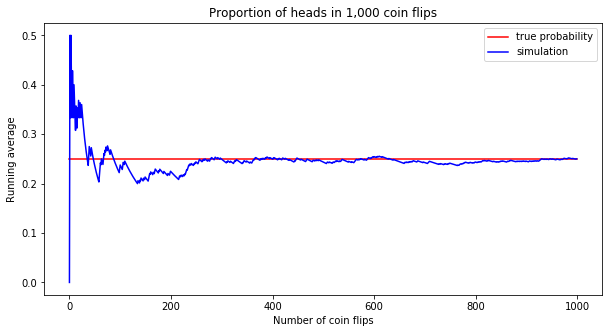

In [3]:
p = 0.25

plt.figure(figsize=(10,5))
plt.title("Proportion of heads in 1,000 coin flips")
plt.plot(np.arange(1000),p*np.ones(1000),'-',color="red",label="true probability")
plt.plot(np.arange(1000),coinSim(p),'-',color="blue",label="simulation")
plt.xlabel("Number of coin flips")
plt.ylabel("Running average")
plt.legend(loc="upper right")